## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

### Linear Regression for dataset 'boston'

In [2]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
target = pd.Series(boston['target'])
print(f'Shape of data: {df.shape}')
print(f'Number of target: {len(boston["target"])}')
print(f'{len(boston["feature_names"])} features included: {boston["feature_names"]}')

Shape of data: (506, 13)
Number of target: 506
13 features included: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Number of unique values for each feature
count = []
for col in df:
    count.append(len(df[col].unique()))
count = pd.DataFrame({'Feature': df.columns, 'Count': count})

# Include only features with > 30 unique values
new_features = list(count[count['Count'] > 30]['Feature'])
new_df = df[new_features]
print(f'{len(new_features)} features are included.')
new_df.head()

10 features are included.


,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


In [6]:
new_df.isnull().sum()

CRIM       0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [7]:
target.isnull().sum()

0

In [8]:
x_train, x_test, y_train, y_test = train_test_split(new_df, target, test_size = 0.3, random_state = 2)

In [9]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [10]:
print(f'Coefficients: {regr.coef_}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2 score: {r2_score(y_test, y_pred)}')

Coefficients: [-5.43288496e-02 -8.24701515e-02 -1.29015815e+01  3.89902206e+00
  1.67582784e-02 -1.15677278e+00  3.47314634e-03 -1.06189157e+00
  1.16075158e-02 -6.16454679e-01]
MSE: 24.187516845529665
R2 score: 0.719713464008745


In [11]:
new_df2 = new_df.loc[:, 'CRIM'].values.reshape(-1, 1)
x_train2, x_test2, y_train2, y_test2 = train_test_split(new_df2, target, test_size = 0.3, random_state = 2)

In [12]:
regr2 = linear_model.LinearRegression()
regr2.fit(x_train2, y_train2)
y_pred2 = regr2.predict(x_test2)

In [13]:
print(f'Coefficient: {regr2.coef_}')
print(f'MSE: {mean_squared_error(y_test2, y_pred2)}')
print(f'R2 score: {r2_score(y_test2, y_pred2)}')

Coefficient: [-0.36158557]
MSE: 68.5742032039495
R2 score: 0.20535762322589368


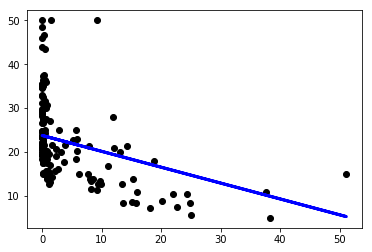

In [14]:
plt.scatter(x_test2, y_test2, color = 'black')
plt.plot(x_test2, y_pred2, color = 'blue', linewidth = 3)
plt.show()

### Logistic Regression for dataset 'wine'

In [15]:
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [16]:
df = pd.DataFrame(wine['data'], columns = wine['feature_names'])
target = pd.Series(wine['target'])
print(f'Shape of data: {df.shape}')
print(f'Number of targets: {len(wine["target"])}')
print(f'{len(wine["feature_names"])} features included: {wine["feature_names"]}')

Shape of data: (178, 13)
Number of targets: 178
13 features included: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [17]:
target.unique()

array([0, 1, 2])

In [18]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [19]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [20]:
target.isnull().sum()

0

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size = 0.3, random_state = 2)

In [22]:
logreg = linear_model.LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [23]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.9444444444444444
